In [1]:
pwd

'/Users/maishamaliha'

In [2]:
#nlcd_sage_beryl_1988.csv
# The rows in the spreadsheet represent patches 
#columns represent sagebrush abundance 

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import scipy.stats as sps
from scipy.optimize import curve_fit

In [3]:
sage=pd.read_csv("nlcd_sage_beryl_1988.csv")

In [4]:
sage.head()

,nlcd_sage_1988_mos_rec_v1,nlcd_sage_1989_mos_rec_v1,nlcd_sage_1990_mos_rec_v1,nlcd_sage_1991_mos_rec_v1,nlcd_sage_1992_mos_rec_v1,nlcd_sage_1993_mos_rec_v1,nlcd_sage_1994_mos_rec_v1,nlcd_sage_1995_mos_rec_v1,nlcd_sage_1996_mos_rec_v1,nlcd_sage_1997_mos_rec_v1,...,nlcd_sage_2008_mos_rec_v1,nlcd_sage_2009_mos_rec_v1,nlcd_sage_2010_mos_rec_v1,nlcd_sage_2011_mos_rec_v1,nlcd_sage_2013_mos_rec_v1,nlcd_sage_2014_mos_rec_v1,nlcd_sage_2015_mos_rec_v1,nlcd_sage_2016_mos_rec_v1,nlcd_sage_2017_mos_rec_v1,nlcd_sage_2018_mos_rec_v1
0,0,5,8,10,9,13,15,14,14,15,...,14,15,15,15,15,15,15,15,15,15
1,0,5,8,10,12,13,17,16,17,17,...,17,17,17,17,17,17,17,17,17,17
2,0,5,8,10,13,13,15,14,14,24,...,26,26,26,26,26,26,26,26,26,26
3,0,5,8,10,13,15,14,15,15,24,...,26,26,26,26,26,26,26,26,26,26
4,0,5,8,8,9,10,11,14,13,14,...,14,14,14,14,14,14,14,14,14,14


In [5]:
sage = sage.rename(columns=lambda x: x.replace('nlcd_sage_', ''))
sage = sage.rename(columns=lambda x: x.replace('_mos_rec_v1', ''))
sage.head()


,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2013,2014,2015,2016,2017,2018
0,0,5,8,10,9,13,15,14,14,15,...,14,15,15,15,15,15,15,15,15,15
1,0,5,8,10,12,13,17,16,17,17,...,17,17,17,17,17,17,17,17,17,17
2,0,5,8,10,13,13,15,14,14,24,...,26,26,26,26,26,26,26,26,26,26
3,0,5,8,10,13,15,14,15,15,24,...,26,26,26,26,26,26,26,26,26,26
4,0,5,8,8,9,10,11,14,13,14,...,14,14,14,14,14,14,14,14,14,14


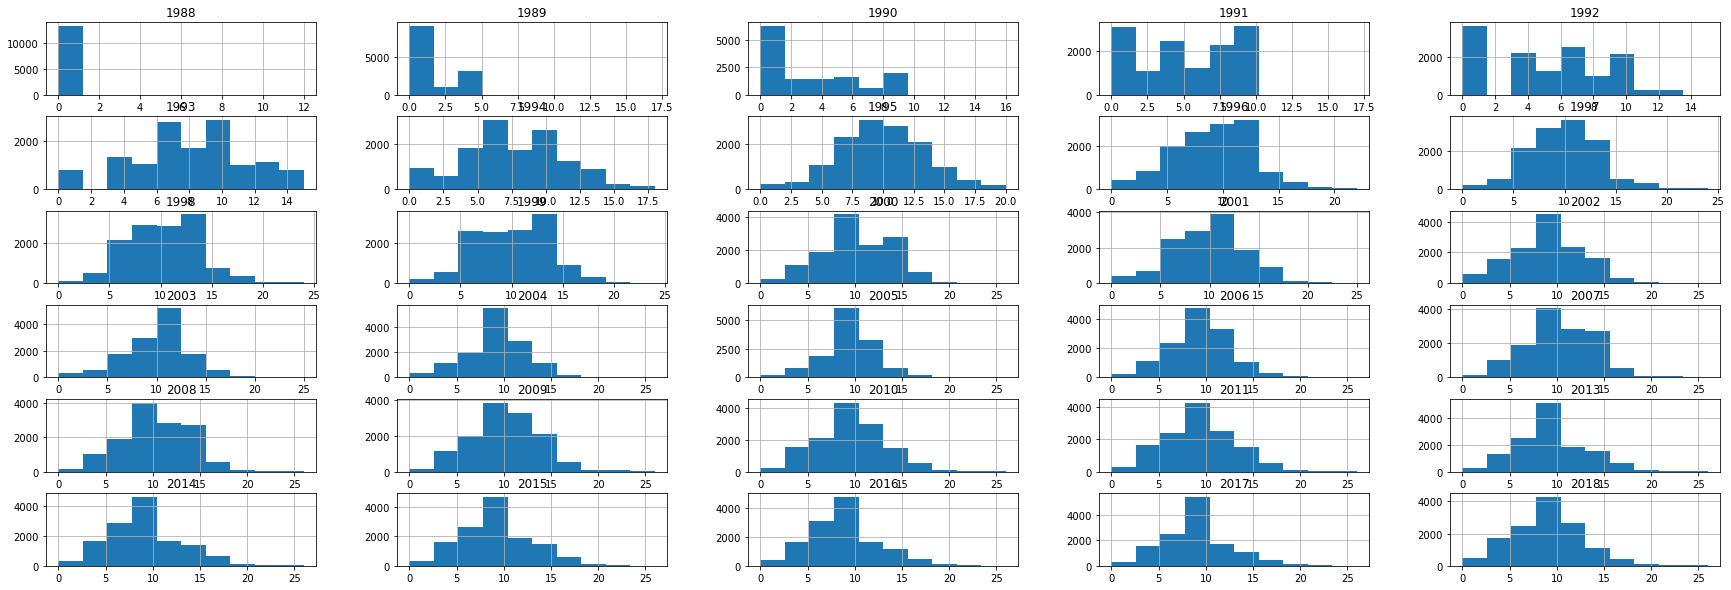

In [7]:
#plt.figure(figsize=(20,8))
sage.hist(bins=10,figsize=(30,10));

In [9]:
#sage.info()

In [6]:
sage.shape

(13327, 30)

In [9]:
sage.columns

Index(['1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2013', '2014', '2015',
       '2016', '2017', '2018'],
      dtype='object')

In [7]:
sage.describe()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2013,2014,2015,2016,2017,2018
count,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,...,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000,13327.000000
mean,0.003076,1.339236,2.899827,5.214152,4.817438,7.844676,7.599385,9.419524,8.949351,9.809560,...,10.144369,9.943948,9.458843,9.301493,9.293990,8.998724,9.084340,8.697982,8.923013,8.903504
std,0.179397,2.065913,3.086371,3.560047,3.604873,3.500482,3.619263,3.498970,3.541300,3.344436,...,3.516905,3.576768,3.627806,3.765374,3.689512,3.821538,3.750063,3.669538,3.596017,3.797318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.000000,0.000000,6.000000,5.000000,7.000000,7.000000,8.000000,...,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000
50%,0.000000,0.000000,3.000000,6.000000,5.000000,8.000000,8.000000,9.000000,9.000000,10.000000,...,10.000000,10.000000,10.000000,9.000000,9.000000,8.000000,9.000000,8.000000,9.000000,9.000000
75%,0.000000,3.000000,5.000000,8.000000,8.000000,10.000000,10.000000,12.000000,11.000000,12.000000,...,13.000000,12.000000,12.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
max,12.000000,17.000000,16.000000,17.000000,15.000000,15.000000,18.000000,20.000000,22.000000,24.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000


In [9]:
sage1=sage.T
#print(sage1)
sage1.head()

,0,1,2,3,4,5,6,7,8,9,...,13317,13318,13319,13320,13321,13322,13323,13324,13325,13326
1988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989,5,5,5,5,5,5,5,5,5,5,...,4,4,4,5,5,5,4,5,5,5
1990,8,8,8,8,8,8,8,8,8,8,...,4,7,5,5,4,7,6,7,8,8
1991,10,10,10,10,8,10,10,10,10,9,...,7,8,10,7,4,10,10,10,10,10
1992,9,12,13,13,9,9,10,11,11,8,...,8,7,9,9,11,9,9,10,10,9


In [10]:
sage1.mean(axis=0)

0        13.333333
1        15.100000
2        20.633333
3        21.000000
4        12.266667
           ...    
13322     9.733333
13323    11.733333
13324     9.333333
13325     9.500000
13326    11.800000
Length: 13327, dtype: float64

In [193]:
sage1['year_mean'] = sage1.mean(axis=1)
#sage1


# Data processing

In [14]:
# The columns in the spreadsheet represent patches 
#rows represent sagebrush abundance 

In [53]:
#sage2 = sage1.rename (columns ={'' : 'year'})

In [13]:

sage_data =sage1[['year_mean']]
#sage_data.drop(sage_data.index[30],inplace= True)
#sage_data.reset_index(inplace=True)
#sage_data = sage_data.rename(columns = {'index':'year'})

In [14]:
sage_data.head()


,year_mean
1988,0.003076
1989,1.339236
1990,2.899827
1991,5.214152
1992,4.817438


In [15]:
sage_data.reset_index(inplace=True)
sage_data = sage_data.rename(columns = {'index':'year'})
#sage_data.drop(["level_0"], axis=1,inplace=True)
#sage_data.drop(["year"], axis=1,inplace=True)
sage_data.head()

,year,year_mean
0,1988,0.003076
1,1989,1.339236
2,1990,2.899827
3,1991,5.214152
4,1992,4.817438


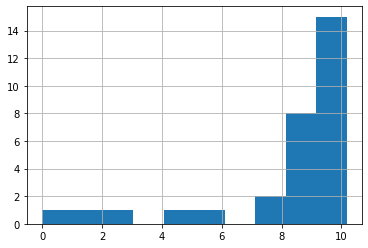

In [20]:
sage_data['year_mean'].hist()
plt.show()

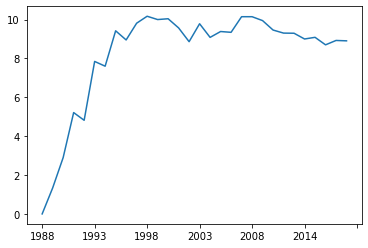

In [48]:
sage_data['year_mean'].plot();

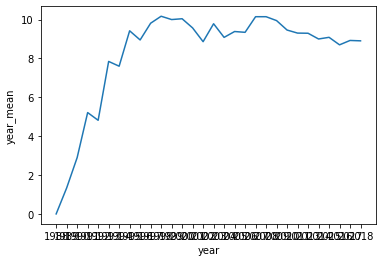

In [13]:
plt.xlabel('year')
plt.ylabel('year_mean')
plt.plot(sage_data['year_mean']);

In [16]:
# Changing the time to date - Most Time Series Models require date structure
sage_data['year'] = sage_data['year'].astype(str) + '-01-01'
sage_data['year'] = pd.to_datetime(sage_data['year'])
sage_data.head()


,year,year_mean
0,1988-01-01,0.003076
1,1989-01-01,1.339236
2,1990-01-01,2.899827
3,1991-01-01,5.214152
4,1992-01-01,4.817438


In [16]:
#sage_data.reset_index(drop=True, inplace=True)
sage_data.head()

,year_mean
0,0.003076
1,1.339236
2,2.899827
3,5.214152
4,4.817438


In [58]:
rolmean=sage_data.rolling(window=2).mean()
rolstd=sage_data.rolling(window=2).std()

In [59]:
#print(rolmean,rolstd)


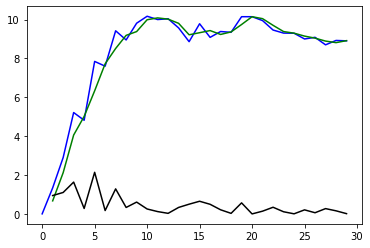

In [60]:
orig = plt.plot(sage_data['year_mean'], color = 'blue',label ='original')
rmn = plt.plot(rolmean, color = 'green',label ='rollingmean')
rstd = plt.plot(rolstd, color = 'black',label ='rollingstd')
plt.show(block=False)

not stationary

In [126]:
#pip install statsmodels


In [42]:
from statsmodels.tsa.stattools import adfuller
sage_data.head()

,year,year_mean
0,1988-01-01,0.003076
1,1989-01-01,1.339236
2,1990-01-01,2.899827
3,1991-01-01,5.214152
4,1992-01-01,4.817438


In [34]:
#meand and std is not constant so data is non-stationary

<AxesSubplot:>

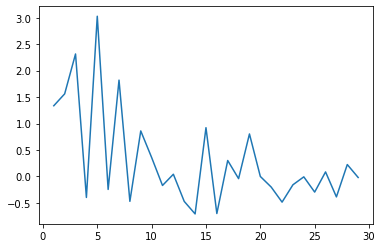

In [124]:
#estimating trend

trans_sage = sage_data.diff().dropna()
trans_sage["year_mean"].plot()




In [79]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(trans_sage['year_mean'])

Results of Dickey-Fuller Test:
Test Statistic                -5.724032e+00
p-value                        6.836647e-07
#Lags Used                     0.000000e+00
Number of Observations Used    2.800000e+01
Critical Value (1%)           -3.688926e+00
Critical Value (5%)           -2.971989e+00
Critical Value (10%)          -2.625296e+00
dtype: float64


In [91]:
#pip install pmdarima
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from PIL import Image

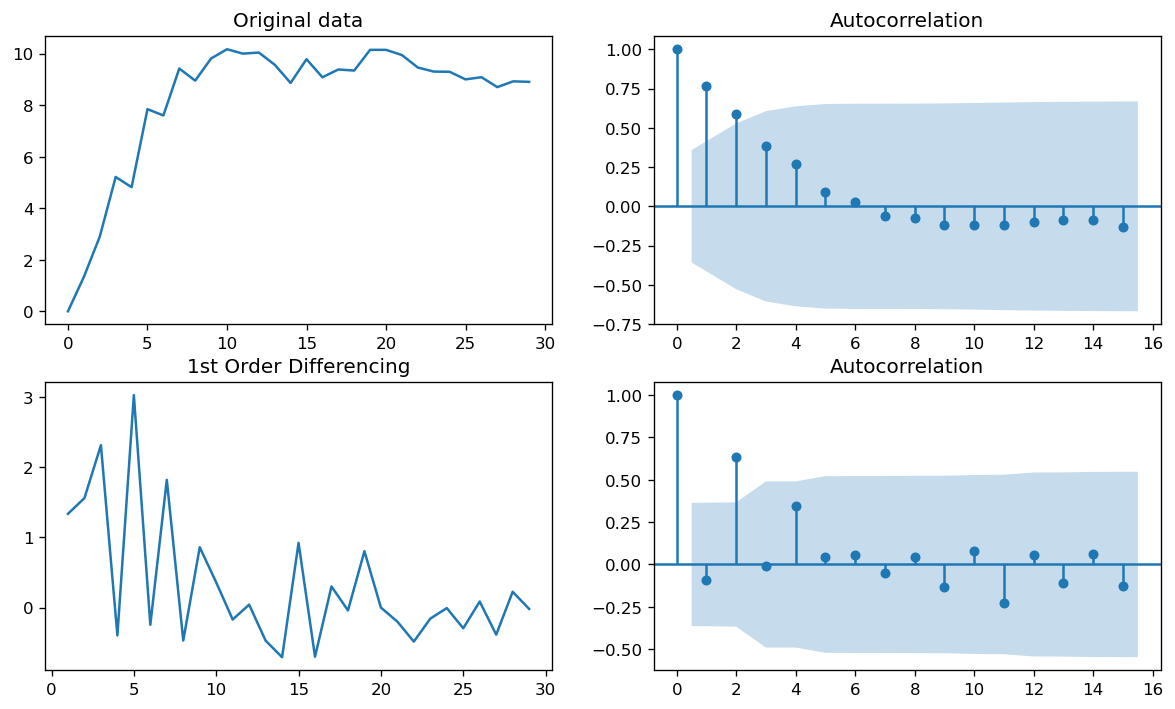

In [127]:
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(sage_data["year_mean"]); 
axes[0, 0].set_title('Original data')
plot_acf(sage_data["year_mean"], ax=axes[0, 1])


# 1st Differencing
axes[1, 0].plot(trans_sage["year_mean"]); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(trans_sage["year_mean"], ax=axes[1, 1])

plt.show()

####################################### Running ARIMA  #####################################
######################################################################################################

In [86]:
ndiffs(trans_sage['year_mean'], test='adf')
#here d=1
#To determine p, we need to look at PACF plot

1

In [69]:
 #To determine p, we need to look at PACF plot

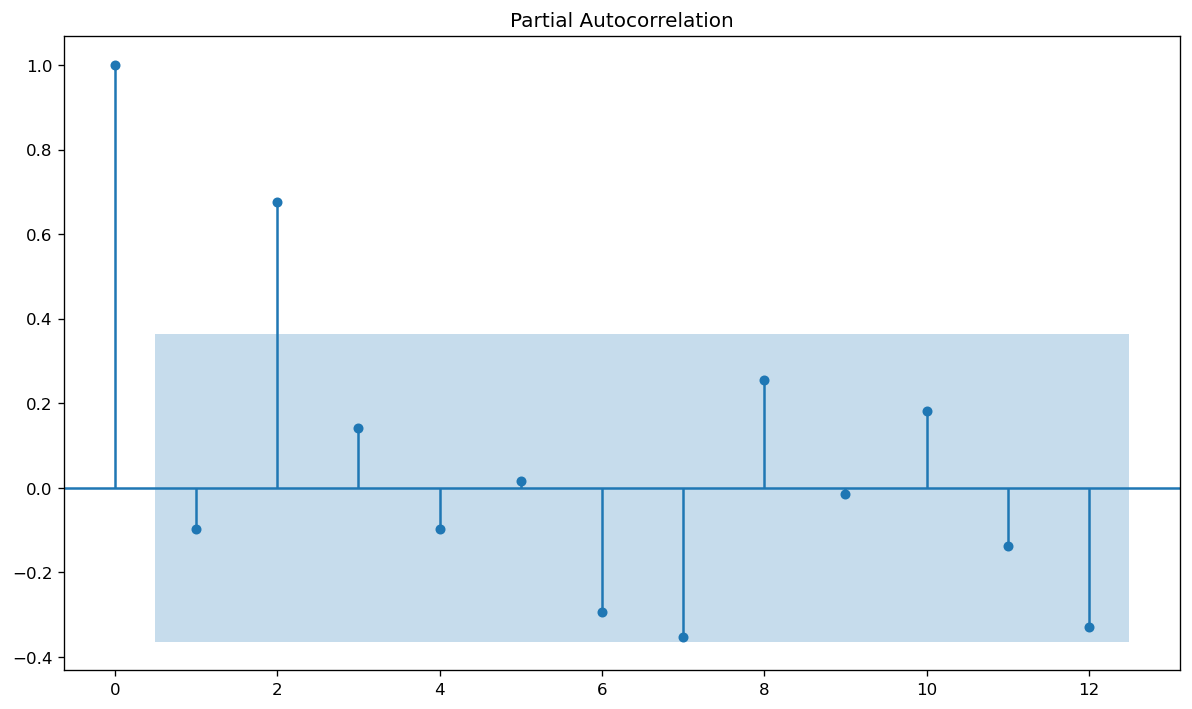

In [102]:

plot_pacf(trans_sage, lags=12)
plt.show()

In [119]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(sage_data['year_mean'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=65.164, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=98.510, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=65.002, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=77.151, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=61.849, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=63.767, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=63.653, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=62.969, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=65.516, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=62.194, Time=0.02 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 0.241 seconds


# Splitting  Dataset

In [93]:
print(sage_data.shape)
train=sage_data.iloc[:-10]
test=sage_data.iloc[-10:]
print(train.shape,test.shape)

(30, 2)
(20, 2) (10, 2)


In [48]:
#pip install statsmodels==0.11.0rc1


In [120]:
from statsmodels.tsa.arima_model import ARIMA

from numpy.linalg import LinAlgError

model=ARIMA(train['year_mean'],order=(2,2,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.year_mean   No. Observations:                   18
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -19.906
Method:                       css-mle   S.D. of innovations              0.691
Date:                Sun, 30 Jan 2022   AIC                             47.812
Time:                        20:48:30   BIC                             51.373
Sample:                             2   HQIC                            48.303
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0797      0.060     -1.321      0.186      -0.198       0.039
ar.L1.D2.year_mean    -1.3170      0.197     -6.677      0.000      -1.704      -0.930
ar.L2.D2.year_mean    -0.5274      0.194     -2.713      0.007      -0.908      -0.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2486           -0.5806j            1.3770           -0.4307
AR.2           -1.2486           +0.5806j            1.3770            0.4307
-----------------------------------------------------------------------------
"""

# Check How Good Your Model Is

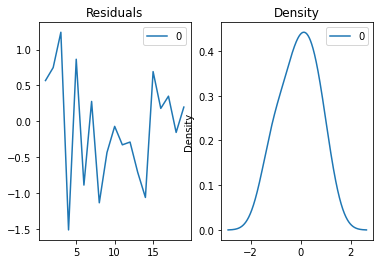

In [75]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [171]:
residuals[0]

1     0.568382
2     0.749205
3     1.241675
4    -1.514572
5     0.865193
6    -0.889316
7     0.277043
8    -1.136288
9    -0.435442
10   -0.070731
11   -0.328169
12   -0.289525
13   -0.711988
14   -1.061910
15    0.692968
16    0.179993
17    0.350293
18   -0.155037
19    0.198125
Name: 0, dtype: float64

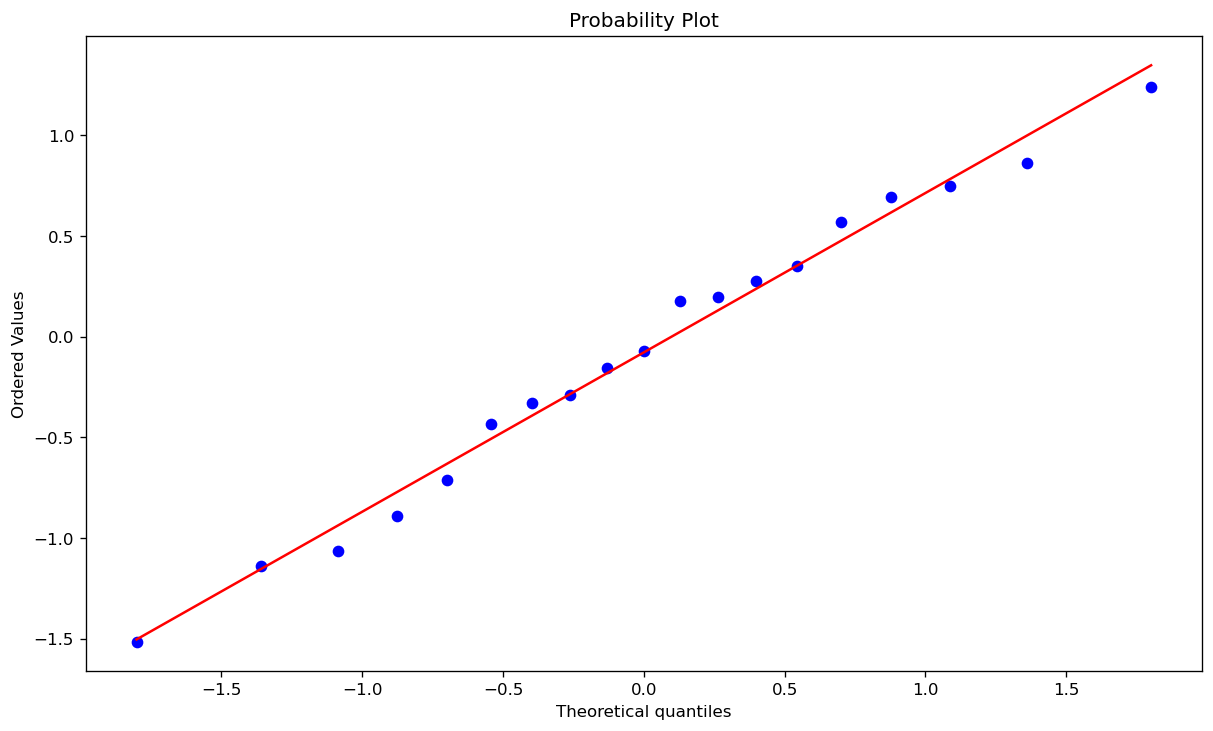

In [172]:
sps.probplot(residuals[0], plot = plt)
plt.show()

In [90]:
print(residuals.describe())

               0
count  19.000000
mean   -0.077374
std     0.753988
min    -1.514572
25%    -0.573715
50%    -0.070731
75%     0.459337
max     1.241675


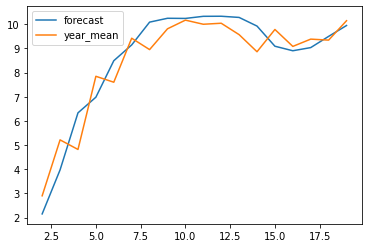

In [76]:
# Actual vs Fitted
model.plot_predict(dynamic=False)
plt.show()


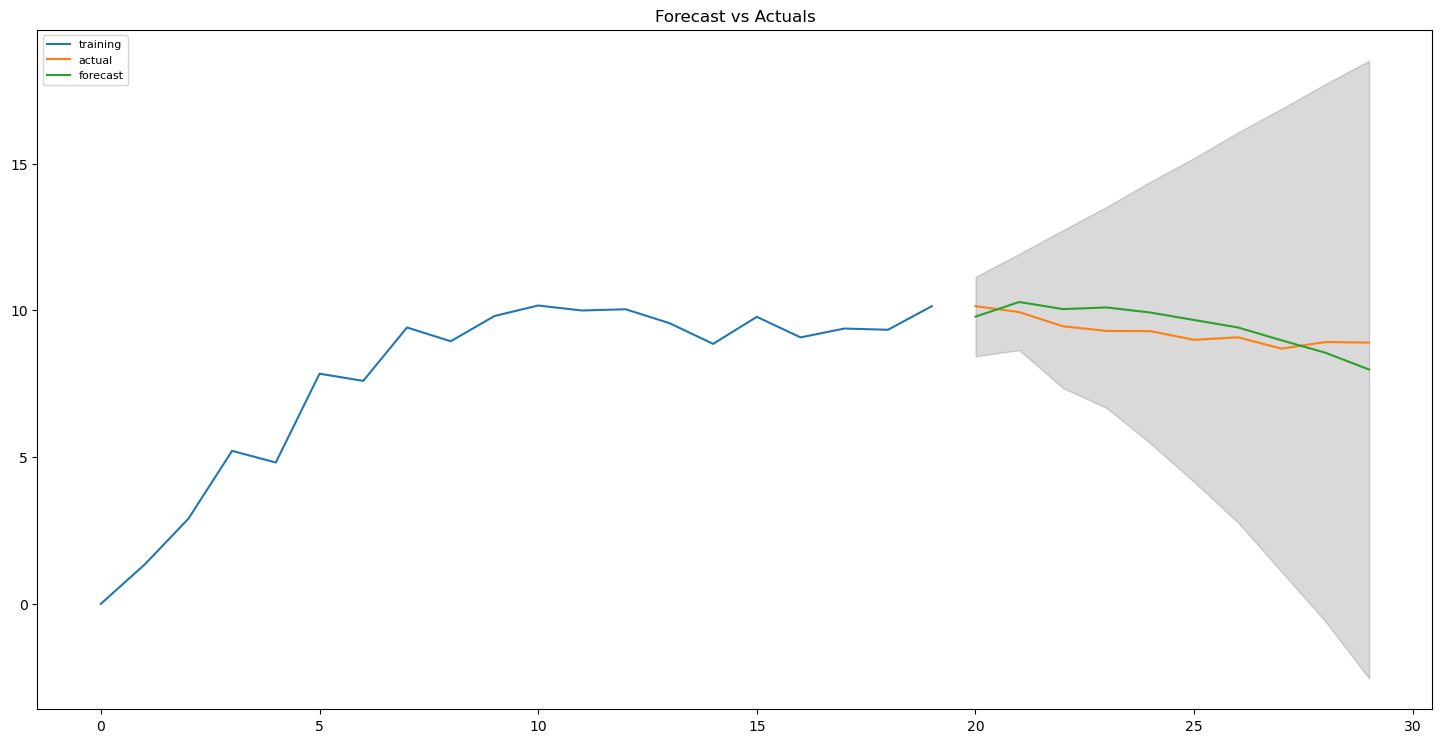

In [192]:

model=ARIMA(train['year_mean'],order=(2,2,0)) 
fitted = model.fit(disp=-1) 

fc, se, conf = fitted.forecast(10, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)


# Plot
plt.figure(figsize=(18,9), dpi=100)
plt.plot(train['year_mean'], label='training')
plt.plot(test['year_mean'], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [186]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-actual)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 'corr':corr, 'minmax':minmax})

val = np.array(test.values)[:,1].astype(float)
forecast_accuracy(fc, val)


{'mape': 0.05742567262152963,
 'me': 0.20236394369805027,
 'mae': 0.529555831167329,
 'mpe': 0.021670600851106708,
 'rmse': 0.5704311340298801,
 'acf1': 0.4676556036819145,
 'corr': 0.6596890501832764,
 'minmax': 0.055071969502771934}

In [183]:
np.array(test.values)[:,1].astype(float).shape

(10,)